In [9]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# Goal of The Data scientist at Care bank 
 
 
 a.  to identify the customers who have a higher probability of subscribing to the term deposit based on the behvaiour of the customers from the previous campsign. 
 
 b. Automate the marketing process to target better customers with minimal budget
 


Data Dictionary:
Bank client data:
1. age: Age of customer
2. job: Type of job
3. marital: Marital status of customer
4. education: Eduction of customer
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has a personal loan?
8. balance: balance in the account
9. contact: contact communication type
Related to this campaign:
1. month: last contact month of the year
2. day_of_week: last contact day of the week
3. campaign: number of contacts performed during this campaign and for this client
Related to the previous campaign:
1. pdays: number of days that passed by after the client was last contacted from a previous campaign
2. previous: number of contacts performed before this campaign and for this client 3. outcome: outcome of the previous marketing campaign
4. Output variable- Target: has the client subscribed to a term deposit?
Customer interaction data:
1. duration: last contact duration, in seconds

In [10]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df=pd.read_csv("/content/drive/My Drive/term_deposit.csv")

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
df.shape

(45211, 17)

In [14]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [15]:
depdata=df

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


 many columns are of type object i.e. strings. These need to be converted to ordinal type

In [17]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# **Feature Engineering**

In [18]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


convert the columns with an 'object' datatype into categorical variables

In [19]:
# Making a list of all categorical variables
cat_cols =  ['job', 'marital', 'education',  'default', 'housing', 'loan','month', 'poutcome', 'Target', 'contact']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
--------------------------------------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
--------------------------------------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
--------------------------------------------------
no     44396
yes      815
Name: default, dtype: int64
--------------------------------------------------
yes    25130
no     20081
Name: housing, dtype: int64
--------------------------------------------------
no     37967
yes     7244
Name: loan, dtype: int64
--------------------------------------------------
may    13766
jul     6895
aug     6247
jun     5341
nov    

In [20]:
df.info() # tocheck converstion into categories

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


Changing all variable to integes

In [21]:
 df['Target'] = df['Target'].replace({'no' :'0','yes':'1'}) # chaning target variable

In [22]:
df['Target'] = df['Target'].astype(str).astype(int)

One hot encoding of all the categorical variables

In [23]:
replaceStruct = {
                "job":     {"technician": 1, "admin.": 2 ,"services": 3 ,"retired":4,"self-employed":5,"entrepreneur":6,"unemployed":7,"housemaid":8,"student":9, "unknown":10},
                "marital": {"married": 1, "single":2 , "divorced": 3},
                 "education": {"secondary": 1, "tertiary":2 , "primary": 3, "unknown": 4},
                 "loan":     {"no": 1, "yes": 2},
                "housing":     {"no": 1, "yes": 2 },
                "month":     {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12 },
                "default":     {"no": 0, "yes": 1 }, 
                 "poutcome":  {"unknown": 1, "failure ": 2, "other": 3, "success" :4},
                 
                 "contact":    {"unknown": 1, "cellular ": 2, "telephone": 3},
                 
                    }
oneHotCols=["job","marital","education","contact","loan","housing","month","default","poutcome"]

In [24]:
oneHotCols=["job","marital","education","contact","loan","housing","month","default","poutcome"]

In [25]:
df=df.replace(replaceStruct) # checking ohe hot 
df=pd.get_dummies(df, columns=oneHotCols)
df.head(10)

,age,balance,day,duration,campaign,pdays,previous,Target,job_1,job_2,...,month_9,month_10,month_11,month_12,default_0,default_1,poutcome_1,poutcome_3,poutcome_4,poutcome_failure
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,44,29,5,151,1,-1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,47,1506,5,92,1,-1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
5,35,231,5,139,1,-1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
6,28,447,5,217,1,-1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
7,42,2,5,380,1,-1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
8,58,121,5,50,1,-1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
9,43,593,5,55,1,-1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               45211 non-null  int64
 1   balance           45211 non-null  int64
 2   day               45211 non-null  int64
 3   duration          45211 non-null  int64
 4   campaign          45211 non-null  int64
 5   pdays             45211 non-null  int64
 6   previous          45211 non-null  int64
 7   Target            45211 non-null  int64
 8   job_1             45211 non-null  uint8
 9   job_2             45211 non-null  uint8
 10  job_3             45211 non-null  uint8
 11  job_4             45211 non-null  uint8
 12  job_5             45211 non-null  uint8
 13  job_6             45211 non-null  uint8
 14  job_7             45211 non-null  uint8
 15  job_8             45211 non-null  uint8
 16  job_9             45211 non-null  uint8
 17  job_10            45211 non-nul

**Split the data into Train and test data**

In [27]:
X = df.drop('Target', axis=1)
y=df['Target']


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

**functions to calculate different metrics- Accuracy, Recall and Precision and plot the confusion matrix.**

In [29]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [30]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

# **Building the model**
We are going to build 2 ensemble models here - Bagging Classifier and Random Forest Classifier.
First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
We will calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall.
Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, 

In [31]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [32]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9921635542073498
Accuracy on test set :  0.901135358301386
Recall on training set :  0.9384116693679092
Recall on test set :  0.4064272211720227
Precision on training set :  0.9942759015455066
Precision on test set :  0.617816091954023


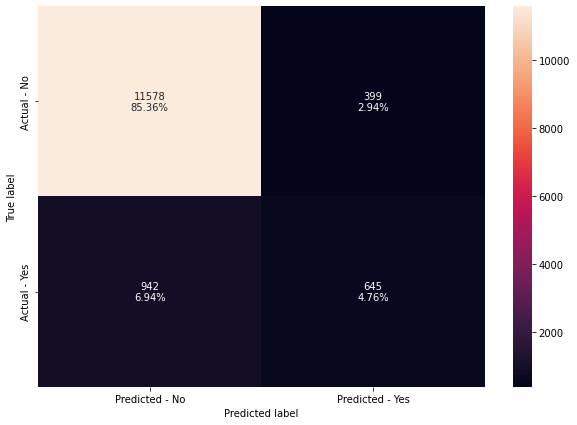

In [33]:
make_confusion_matrix(bagging_estimator,y_test)

Model is performing poorly on the test set

# **Random Forest**

In [34]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [35]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9060749041580655
Recall on training set :  1.0
Recall on test set :  0.39382482671707625
Precision on training set :  1.0
Precision on test set :  0.6670224119530416


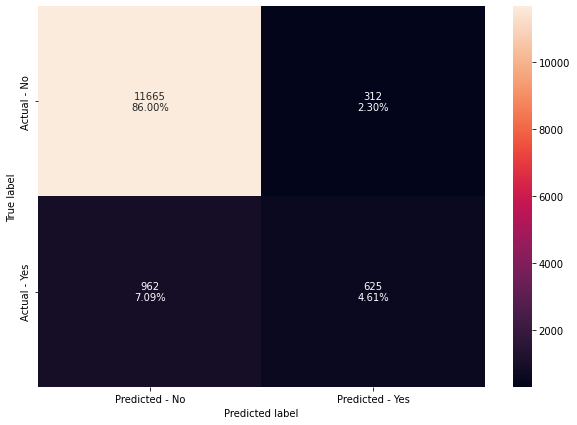

In [36]:
make_confusion_matrix(rf_estimator,y_test)

With default parameters:
Both models - Bagging classifiers as well as random forest classifier are overfitting the train data.


# **Hyperparameter Tuning**

Some of the important hyperparameters available for bagging classifier are:
**base_estimator:** The base estimator to fit on random subsets of the dataset. If 
None(default), then the base estimator is a decision tree.
**n_estimators:** The number of trees in the forest, default = 100.
**max_features: **The number of features to consider when looking for the best split.
**bootstrap:** Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
**bootstrap_features:** If it is true, then features are drawn with replacement. Default value is False.
**max_samples:** If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
**oob_score:** Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

In [38]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=30,
                  random_state=1)

**Different metrics for bagging classifier with best hyperparameters and build a confusion matrix.**

In [39]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9976301071191582
Accuracy on test set :  0.9068121498083161
Recall on training set :  0.9802809292274446
Recall on test set :  0.40894770006301195
Precision on training set :  0.9994491875516387
Precision on test set :  0.6656410256410257


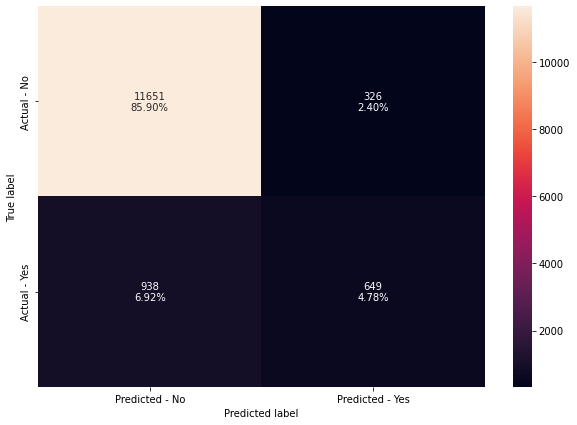

In [40]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

Now, let's see if we can get a better model by tuning the random forest classifier. Some of the important hyperparameters available for random forest classifier are:

n_estimators: The number of trees in the forest, default = 100.
max_features: The number of features to consider when looking for the best split.
class_weight: Weights associated with classes in the form {class_label: weight}.If not given, all classes are supposed to have weight one.
For example: If the frequency of class 0 is 80% and the frequency of class 1 is 20% in the data, then class 0 will become the dominant class and the model will become biased toward the dominant classes. In this case, we can pass a dictionary {0:0.2,1:0.8} to the model to specify the weight of each class and the random forest will give more weightage to class 1.
bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.
Note: A lot of hyperparameters of Decision Trees are also available to tune Random Forest like max_depth, min_sample_split etc.




*   List item



In [41]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7 ),
    "max_samples": np.arange(0.3, 0.7),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.2, max_samples=0.3, min_samples_leaf=5,
                       n_estimators=150, random_state=1)

In [42]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9219199292191993
Accuracy on test set :  0.9046741374225892
Recall on training set :  0.44246353322528365
Recall on test set :  0.34782608695652173
Precision on training set :  0.8009779951100244
Precision on test set :  0.6814814814814815


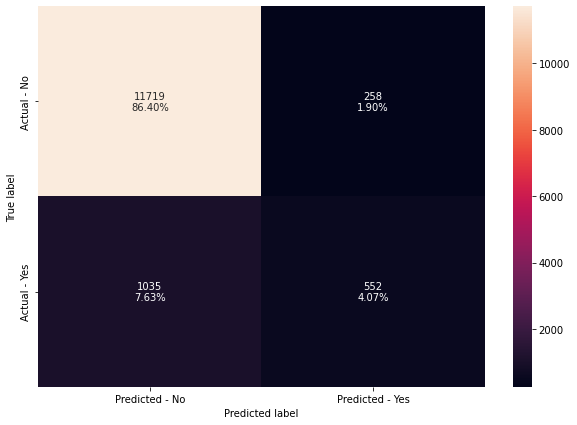

In [43]:
make_confusion_matrix(rf_estimator_tuned,y_test)

Insights

We can see that random forest's performance has increased as compared to the random forest model with default parameters.


# class_weight **bold text**

In [44]:
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7 ),
    "max_samples": np.arange(0.3, 0.7),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_features=0.2,
                       max_samples=0.3, min_samples_leaf=8, n_estimators=250,
                       random_state=1)

In [45]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.9166113691661137
Accuracy on test set :  0.901135358301386
Recall on training set :  0.6685575364667747
Recall on test set :  0.5923125393824826
Precision on training set :  0.6367378440957037
Precision on test set :  0.5752753977968176


There may be yet better parameters which may result in a better accuracy and recall.Best recall till now.Random forest gave us the better recall than any other models.

Hyperparameter tuning is tricky and exhaustive in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model until you try those hyperparameters.
The final results depend on the parameters used/checked using GridSearchCV.


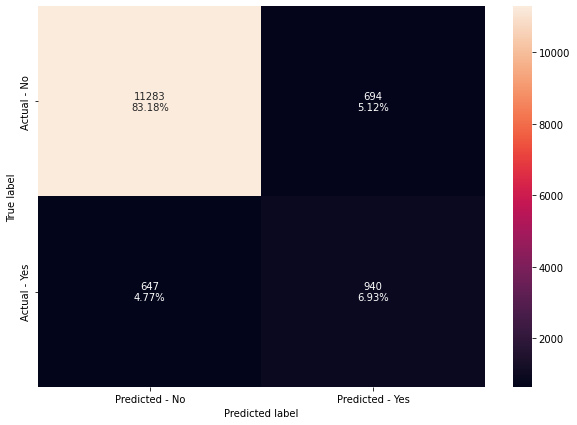

In [46]:
make_confusion_matrix(rf_estimator_weighted,y_test)

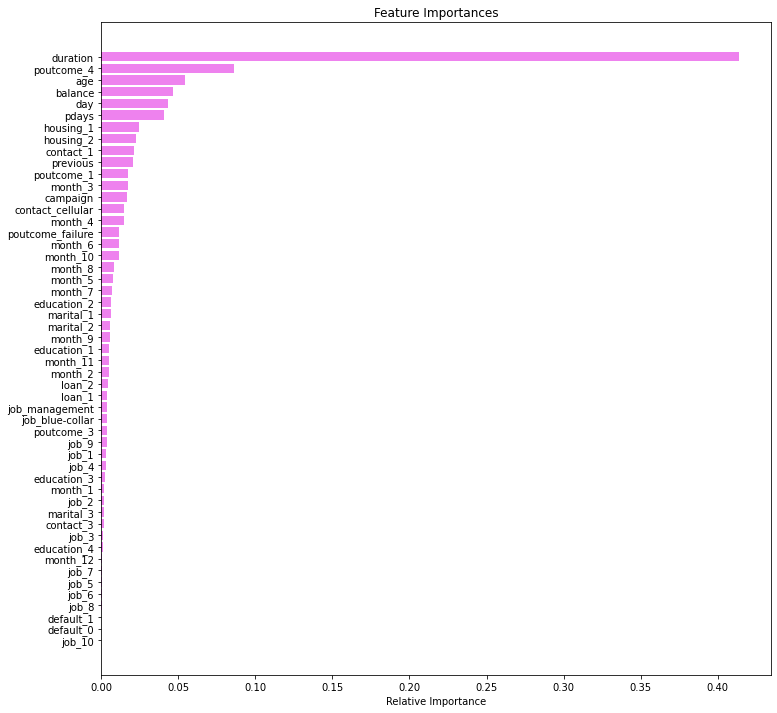

In [47]:
importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The top three features are : Duration: Last contact duration with the customer is the top feature. 
This is followed by previous outcome of the last campaign
followed by Age of the customer.




# **Checking the feature importance**

# **Comparing all models till now**

In [48]:
# defining list of models
models = [bagging_estimator,bagging_estimator_tuned,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [49]:
comparison_frame = pd.DataFrame({'Model':['Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Random Forest with deafult parameters',
                                         'Tuned Random Forest Classifier','Random Forest with class_weights'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

In [50]:
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Bagging classifier with default parameters,0.99,0.90,0.94,0.41,0.99,0.62
1,Tuned Bagging Classifier,1.00,0.91,0.98,0.41,1.00,0.67
2,Random Forest with deafult parameters,1.00,0.91,1.00,0.39,1.00,0.67
3,Tuned Random Forest Classifier,0.92,0.90,0.44,0.35,0.80,0.68
4,Random Forest with class_weights,0.92,0.90,0.67,0.59,0.64,0.58


As shown in the above Table, we found Random forest with class weights as the best model so far with good recall among many models tests. 

Random Forest with class weights gave the best recall

In [51]:
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier

# **Boosting **

Building the model **bold text**
We are going to build 3 ensemble models here - **AdaBoost Classifier, Gradient Boosting Classifier and XGBoost Classifier.**
First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
We will calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall.
Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a defaulter as non defaulter

In [52]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [66]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.9013808575852371
Accuracy on test set :  0.9024624004718372
Recall on training set :  0.38600756347920046
Recall on test set :  0.391304347826087
Precision on training set :  0.6275801493192797
Precision on test set :  0.6349693251533742


Recall ismuch less

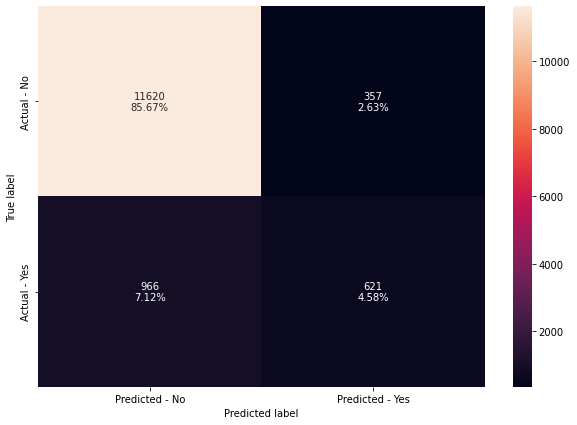

In [53]:
make_confusion_matrix(abc,y_test)

# **Gradient Boosting Classifier**

In [54]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [55]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.9114292034000063
Accuracy on test set :  0.9060011795930404
Recall on training set :  0.43354943273906
Recall on test set :  0.4120982986767486
Precision on training set :  0.6945045434876677
Precision on test set :  0.6566265060240963


# XGBoost **Classifier**

In [57]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', random_state=1)

In [58]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9101652605302241
Accuracy on test set :  0.9031996461220879
Recall on training set :  0.39951377633711505
Recall on test set :  0.369880277252678
Precision on training set :  0.704621248213435
Precision on test set :  0.6522222222222223


Even XGB has less recall. !

With default parameters:
AdaBoost classifier has better test accuracy among these 3 models.
GB classifier has least test accuracy and test recall.**bold text**

In [56]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1.1, n_estimators=60, random_state=1)

In [59]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9169273548835593
Accuracy on test set :  0.9030521969920378
Recall on training set :  0.5451107509454349
Recall on test set :  0.481411468178954
Precision on training set :  0.6810664866689167
Precision on test set :  0.60828025477707


Even tuning helped only marginally.

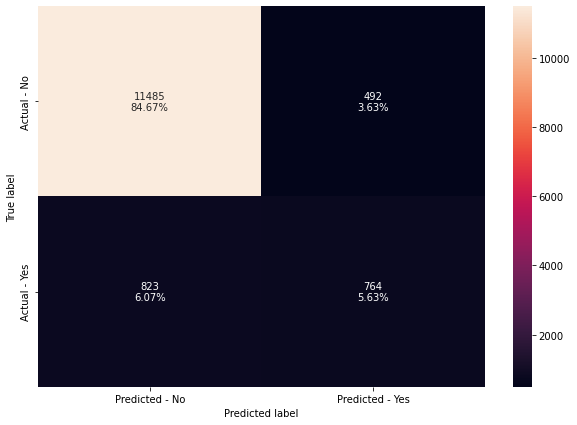

In [60]:
make_confusion_matrix(abc_tuned,y_test)

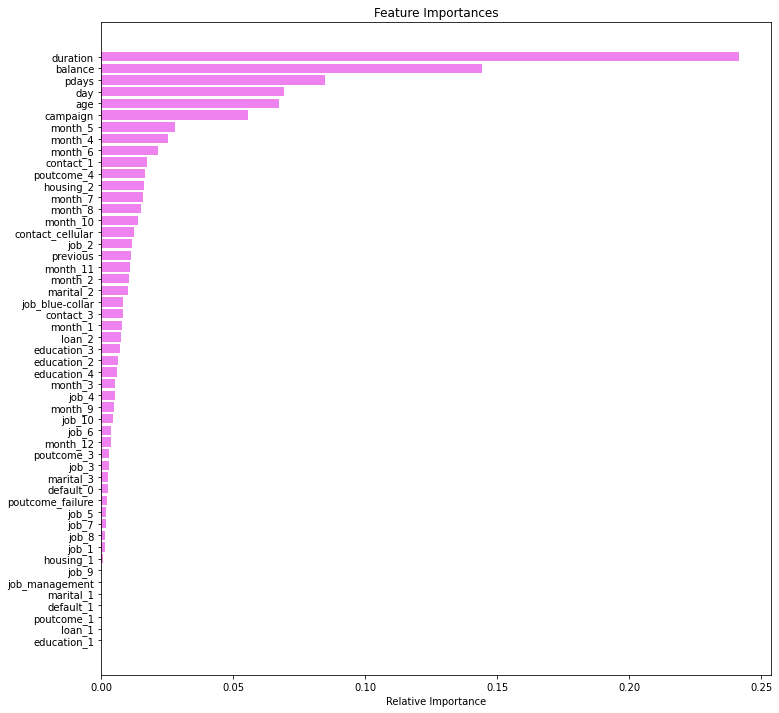

In [61]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

With Ada boost the recall is still less 0.48. 
But the top three are Duration i.e the last contact duration is the top variable.  THis is followed by the  Balance of hte accont  and pDays: No. of days that passed by after the client was last contacted from a previous campaign.

# **Gradient Boosting Classifier**

- Most of the hyperparameters available are same as random forest classifier.
- init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
- There is no class_weights parameter in gradient boosting.

**Let's try using AdaBoost classifier as the estimator for initial predictions**

In [62]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [63]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.91152399911524
Accuracy on test set :  0.9057062813329402
Recall on training set :  0.4286871961102107
Recall on test set :  0.4045368620037807
Precision on training set :  0.6985035211267606
Precision on test set :  0.6577868852459017


THe recall is still not so great.  we will use init = AdaBoostClassifier() to tune the gradient boosting model.

In [80]:
 #Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=250, random_state=1,
                           subsample=0.9)

In [65]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9200240149145259
Accuracy on test set :  0.908876437629018
Recall on training set :  0.5005402485143166
Recall on test set :  0.4543163201008192
Precision on training set :  0.7309664694280079
Precision on test set :  0.6608615948670944


Slight improvement of the recall to 0.45.
- The model performace has not increased by much.
- The model has started to overfit the train data in terms of recall.


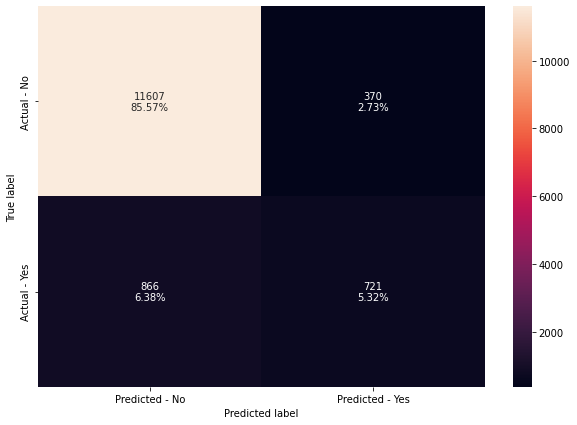

In [67]:
make_confusion_matrix(gbc_tuned,y_test)

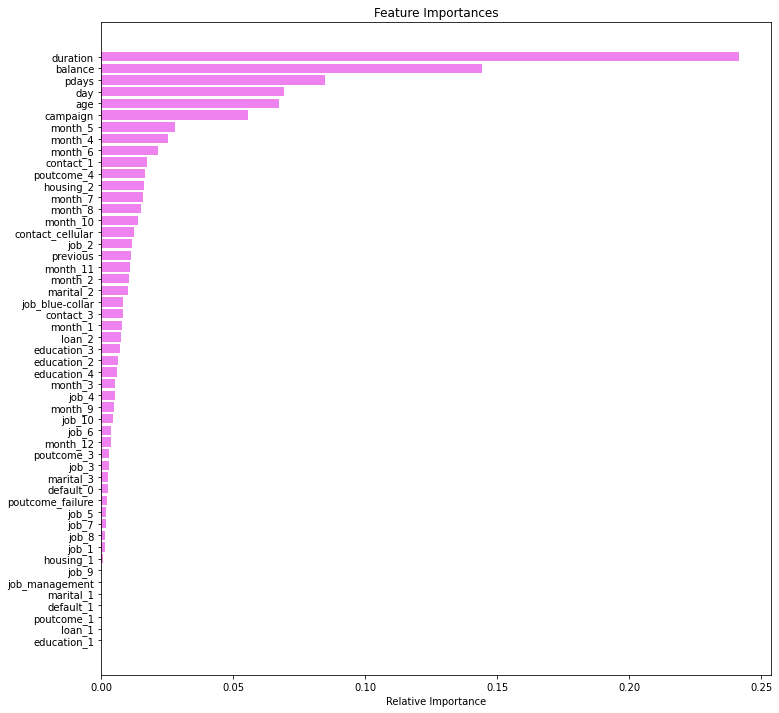

In [68]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Duration is the most important feature again. 

# XGBoost Classifier

**XGBoost has many hyper parameters which can be tuned to increase the model performance. You can read about them in the xgboost documentation [here](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters). Some of the important parameters are:**
- scale_pos_weight:Control the balance of positive and negative weights, useful for unbalanced classes. It has range from 0 to $\infty$.
- subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
- colsample_bytree: Corresponds to the fraction of features (the columns) to use.
- colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.
- colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level.
- max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.
- learning_rate/eta: Makes the model more robust by shrinking the weights on each step.
- gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.

I spend more than two days tryin to run Hyperparamers on XGB. It was not possible. I want to move on,,

In [76]:
# defining list of models
models = [bagging_estimator,bagging_estimator_tuned,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [77]:
comparison_frame = pd.DataFrame({'Model':['Bagging classifier with default parameters','Tuned Bagging Classifier',
                                         'Random Forest with deafult parameters',
                                         'Tuned Random Forest Classifier','Random Forest with class_weights'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Bagging classifier with default parameters,0.99,0.90,0.94,0.41,0.99,0.62
1,Tuned Bagging Classifier,1.00,0.91,0.98,0.41,1.00,0.67
2,Random Forest with deafult parameters,1.00,0.91,1.00,0.39,1.00,0.67
3,Tuned Random Forest Classifier,0.92,0.90,0.44,0.35,0.80,0.68
4,Random Forest with class_weights,0.92,0.90,0.67,0.59,0.64,0.58


The Best model Random forest with class weights identify about 60% of the customers. 

1. This is NOT a great recall rate, which means that our model can only predict 60% of times if a new campaign by the bank would convert the existing bank custemrs to take a term deposit subscritpiton.  

2. The most important variable for the customers to convert and take the term deposit subscription is the Customer interaction : duration of the of the customer contact in seconds.  This possibly means, the bank call center can potentially convince the customer to take the loan. Given that call centers are much more expensive than the ad camgaingn we can also consider the ad campaign.

As an marketing campaign  to subscribing to the term deposit. This will increase the success ratio while at the same time reduce the cost of the campaign/ or even call center costs. 
This is because, Even with such not so great recall values, Bank can even offer Term subsctiption to many memebrs as the loss to the bank if the customers go back on the term subscription is very less as the the customer is ready to compensate the bank if htey broke the subscription.

The only cost would be the cost of the cost of the campaing automation.  

